# Matplotlib: Beyond the basics

## Status and plan for today

By now you know the basics of:

- Numpy array creation and manipulation.
- Display of data in numpy arrays, sufficient for interactive exploratory work.

Hopefully after this week you will:

- Know how to polish those figures to the point where they can go to a journal.
- Understand matplotlib's internal model enough to:
  - know where to look for knobs to fine-tune
  - better understand the help and examples online
  - use it as a development platform for complex visualization

<style type="text/css">
    .exercise {
        border: solid 3px #AAE;
        background: #EEF;
        padding: 50px 10px 50px 10px;
        display: inline-block;
        font-size: 110%;
    }
</style>

# Matplotlib's main APIs: ``pyplot`` and object-oriented

Matplotlib is a library that can be thought of as having two main ways of being
used:

- via ``pyplot`` calls, as a high-level, matlab-like library that automatically
  manages details like figure creation.

- via its internal object-oriented structure, at the cost of slightly more verbose calls for the
  most common use cases.

The pyplot api:

- Easiest to use, especially for those familiar with MATLAB.
- Sufficient for simple and moderately complex plots.
- Does not offer complete control over all details.

Before we look at our first simple example, we must activate pylab support in the notebook. Execute one of the following:

In [1]:
# use this for floating figures:
#%matplotlib

# use this for inlined figures:
%matplotlib inline

enabling inline matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np

First, let's create a simple pair of figures using the pyplot API, working with the simple arrays `x`, `y` and `z`:

In [3]:
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
z = np.cos(x)

Using `pyplot` (which we've shorthanded to `plt`), all axis and figure management is done for us:

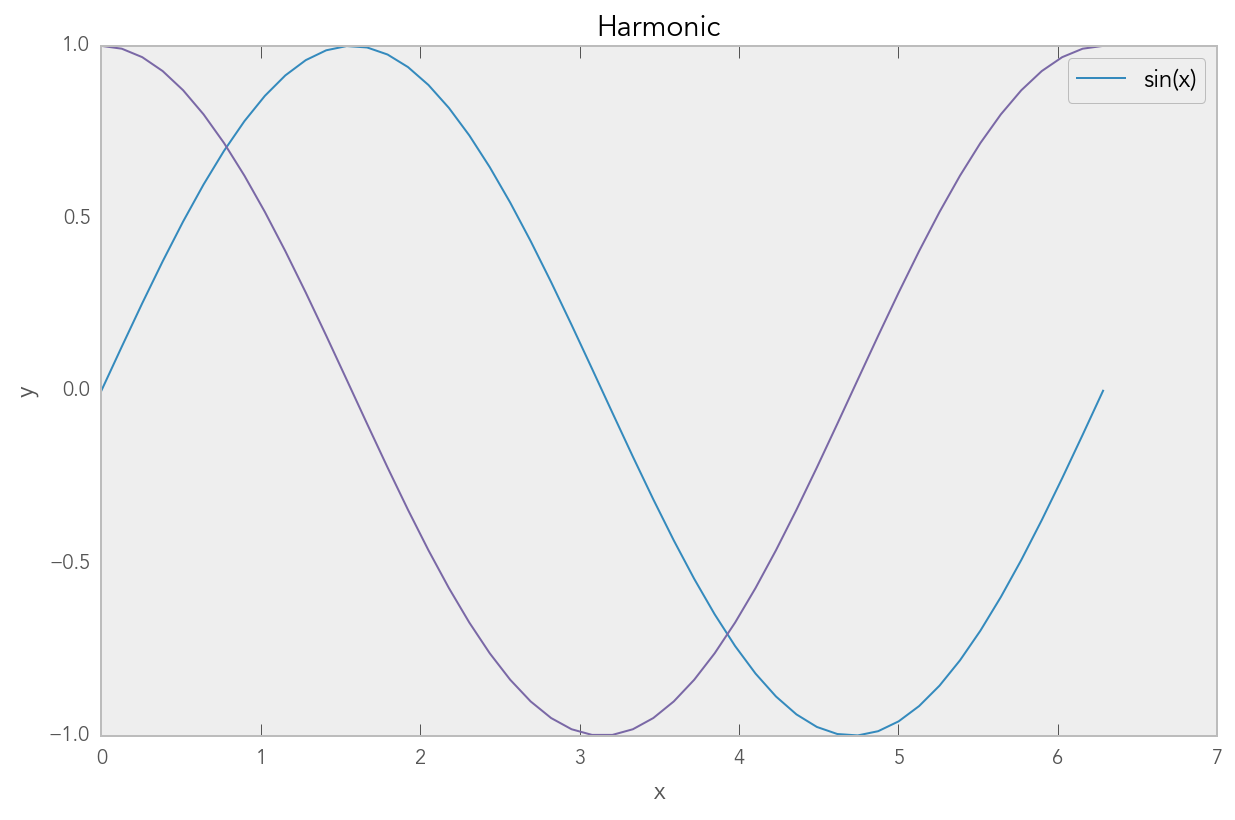

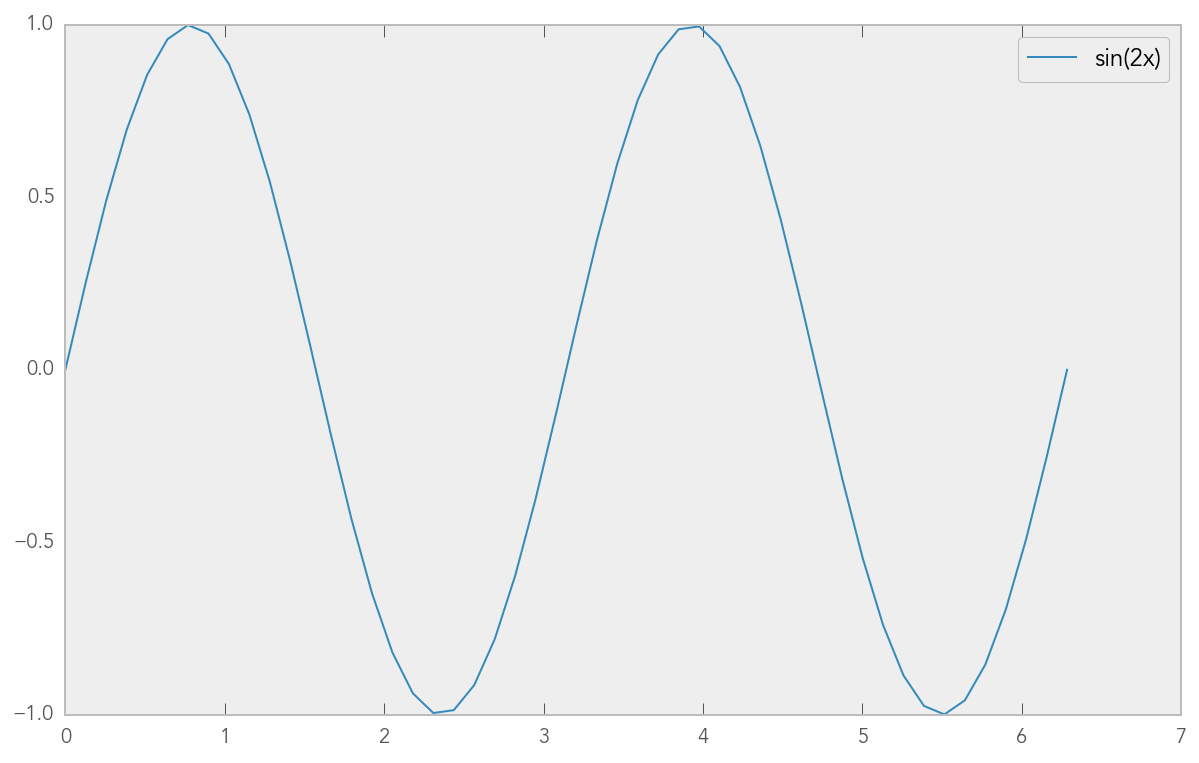

In [4]:
plt.plot(x,y, label='sin(x)')
plt.legend()
plt.title('Harmonic')
plt.xlabel('x')
plt.ylabel('y')

# Add one line to that plot
plt.plot(x, z, label='cos(x)')

# Make a second figure with a simple plot
plt.figure()
plt.plot(x, np.sin(2 * x), label='sin(2x)')
plt.legend();

**Note:** why didn't the "cos(x)" label show up in the legend for the first figure above?

Now, let us see how to create the same two plots using the object oriented interface:

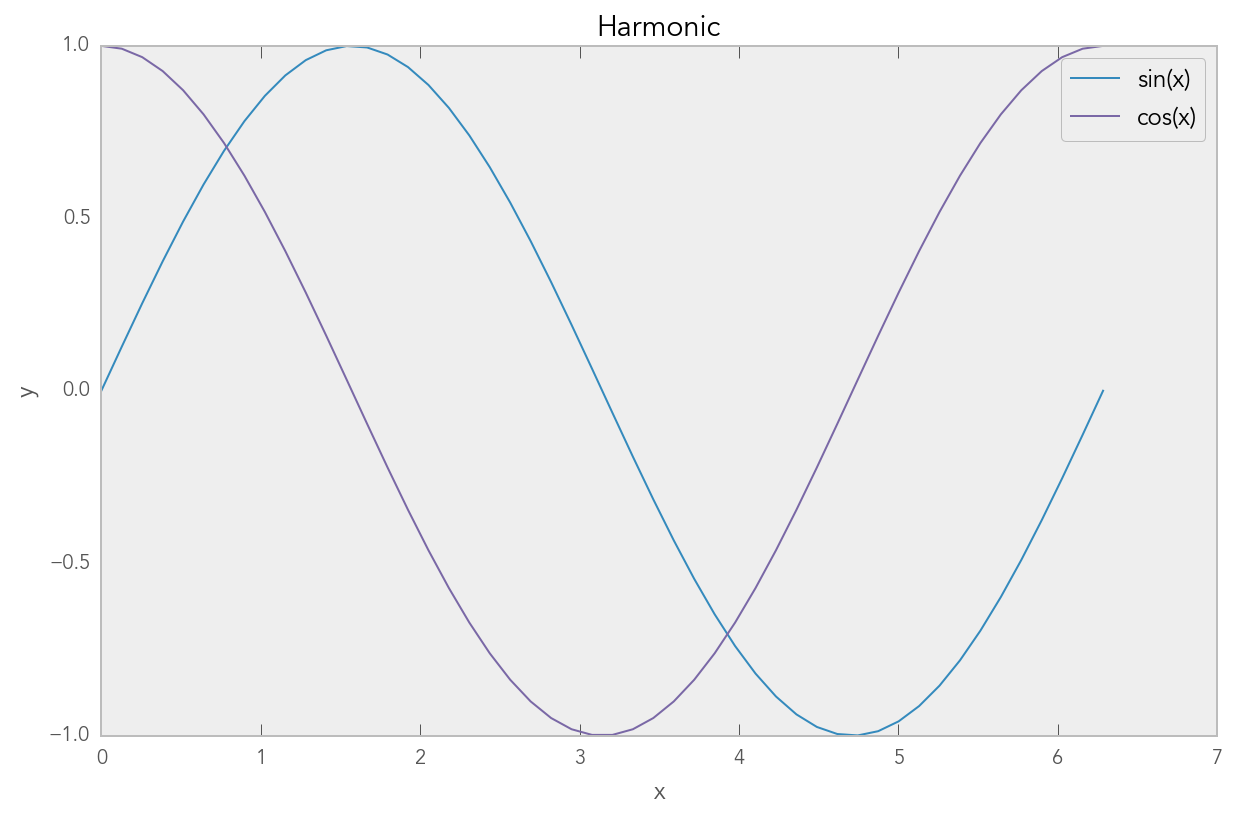

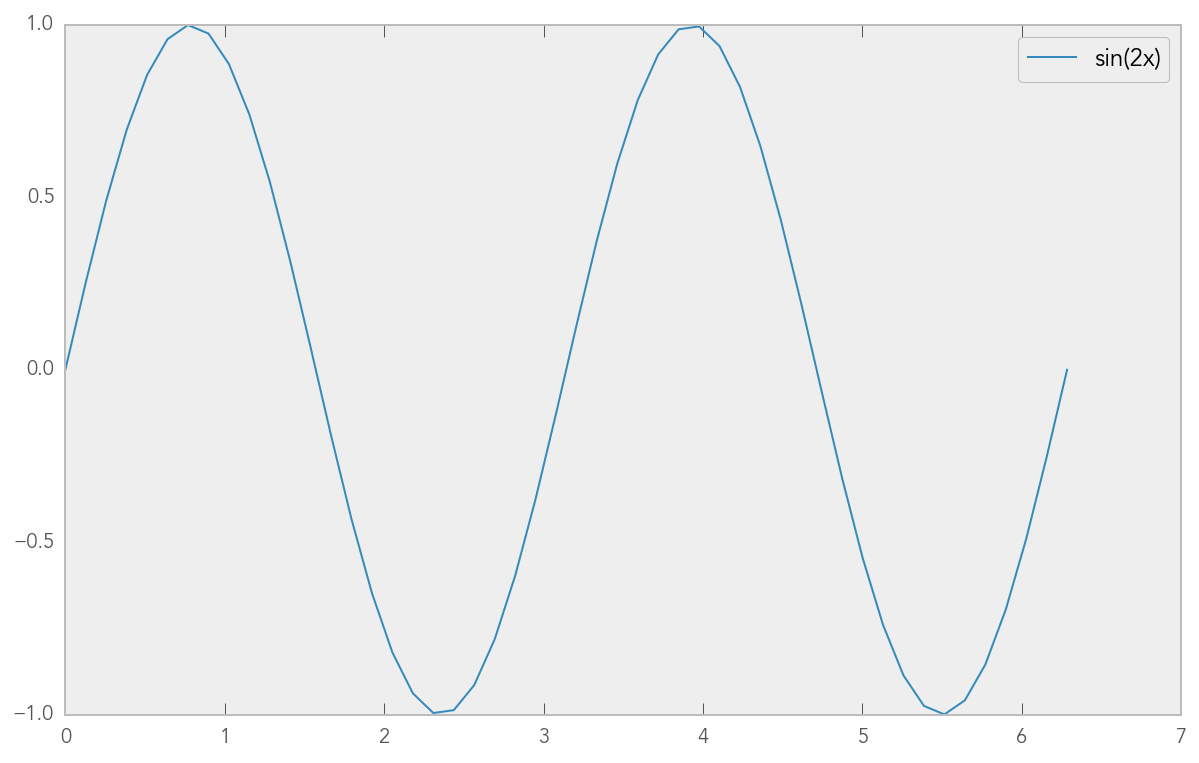

In [5]:
f, ax0 = plt.subplots()         # we manually make a figure and axis
ax0.plot(x, y, label='sin(x)')  # it's the axis who plots
ax0.legend()
ax0.set_title('Harmonic')       # we set the title on the axis
ax0.set_xlabel('x')             # same with labels
ax0.set_ylabel('y')

# Make a second figure with a simple plot.  We can name the figure with a
# different variable name as well as its axes, and then control each
f1, ax1 = plt.subplots()
ax1.plot(x, np.sin(2 * x), label='sin(2x)')
ax1.legend()

# Since we now have variables for each axis, we can add back to the first
# figure even after making the second
ax0.plot(x, np.cos(x), label='cos(x)')
ax0.legend();

Note that these objects (figures, axes, etc.) still exist, even if you use mostly the top-level pyplot calls.

Important commands to know about, and which matplotlib uses internally a lot (these presume you have run, as above, `import matplotlib.pyplot as plt`):

    plt.gcf()  # get current figure
    plt.gca()  # get current axis

# Making subplots

The simplest command is:

```python
f, ax = plt.subplots() # or  plt.subplots(1, 1)
```

which is a convenience function that does:

```python
f = plt.figure()
ax = f.add_subplot(1, 1, 1)  # (M, N, S) -> in an M x N grid, choose subplot #S
```

By passing arguments to `subplots`, you can easily create a regular plot grid:

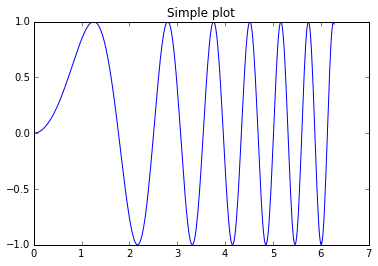

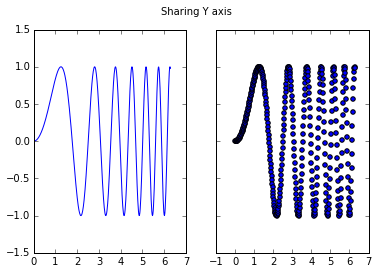

In [6]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x**2)

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Two subplots, unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax2.scatter(x, y)

# Put a figure-level title
f.suptitle('Sharing Y axis')

And finally, an arbitrarily complex grid can be made with ``subplot2grid``:

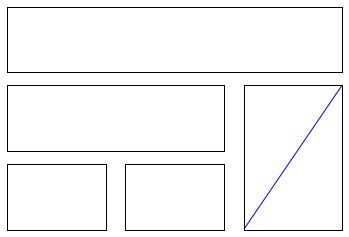

In [7]:
f = plt.figure()

# subplot2grid(A, B) -> create a grid of shape A
#                    -> return the axis at position B

ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

# Turn off tick labels
for ax in f.axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
# Plot something in the bottom right box
ax3.plot([1, 2, 3])

Manipulating properties across matplotlib
=========================================

In matplotlib, most properties for lines, colors, etc, can be set directly in
the plot call:

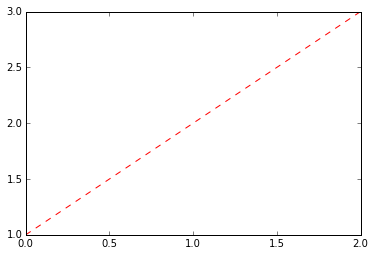

In [8]:
plt.plot([1, 2, 3], linestyle='--', color='r')

But for finer control you can get a hold of the returned line object (more on
these objects later)::

    In [1]: line, = plot([1,2,3])

These line objects have a lot of properties you can control, a full list is
seen here by tab-completing in IPython::

    In [2]: line.set
    line.set                     line.set_drawstyle           line.set_mec
    line.set_aa                  line.set_figure              line.set_mew
    line.set_agg_filter          line.set_fillstyle           line.set_mfc
    line.set_alpha               line.set_gid                 line.set_mfcalt
    line.set_animated            line.set_label               line.set_ms
    line.set_antialiased         line.set_linestyle           line.set_picker
    line.set_axes                line.set_linewidth           line.set_pickradius
    line.set_c                   line.set_lod                 line.set_rasterized
    line.set_clip_box            line.set_ls                  line.set_snap
    line.set_clip_on             line.set_lw                  line.set_solid_capstyle
    line.set_clip_path           line.set_marker              line.set_solid_joinstyle
    line.set_color               line.set_markeredgecolor     line.set_transform
    line.set_contains            line.set_markeredgewidth     line.set_url
    line.set_dash_capstyle       line.set_markerfacecolor     line.set_visible
    line.set_dashes              line.set_markerfacecoloralt  line.set_xdata
    line.set_dash_joinstyle      line.set_markersize          line.set_ydata
    line.set_data                line.set_markevery           line.set_zorder
    

Alternatively, the ``setp`` call (short for set property) can be used to list and set properties::

    In [7]: line, = plot([1,2,3])

    In [8]: plt.setp(line)
      agg_filter: unknown
      alpha: float (0.0 transparent through 1.0 opaque)         
      animated: [True | False]         
      antialiased or aa: [True | False]
      ...
      ... much more output elided
      ...

    In [9]: plt.setp(line, 'linestyle')
      linestyle: [ ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''`` ]         and any drawstyle in combination with a linestyle, e.g. ``'steps--'``.         

The ``setp`` command can be used to list properties and their valid values,
making it very easy to discover how to customize your figures to get the visual results
you need.

Furthermore, ``setp`` can manipulate multiple objects at a time:

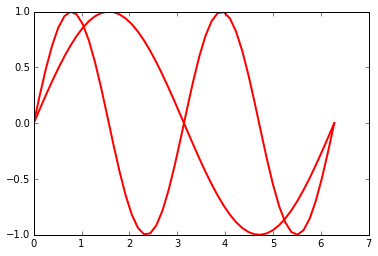

In [9]:
x = np.linspace(0, 2*np.pi)
y1 = np.sin(x)
y2 = np.sin(2*x)
lines = plt.plot(x, y1, x, y2)

# We will set the width and color of all lines in the figure at once:
plt.setp(lines, linewidth=2, color='r');

Understanding what matplotlib returns: lines, axes and figures
==============================================================

Lines
-----

In a simple plot:

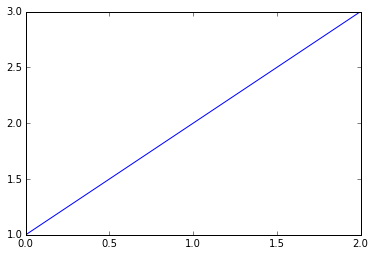

In [10]:
plt.plot([1,2,3])

The return value of the plot call is a list of lines, which can be manipulated
further.  If you capture the line object (in this case it's a single line so we
use a one-element tuple):

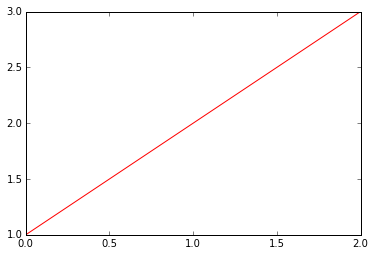

In [11]:
line, = plt.plot([1,2,3])
line.set_color('r')

One line property that is particularly useful to be aware of is ``set_data``:

(0, 1)

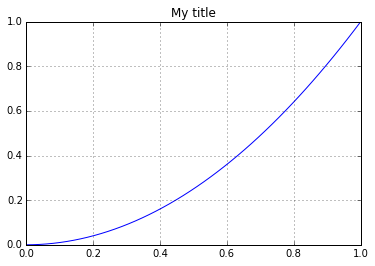

In [12]:
# Create a plot and hold the line object
f, ax = plt.subplots()
line, = ax.plot([1, 2, 3], label='my data')

ax.grid()
ax.set_title('My title')

# ... later, we may want to modify the x/y data but keeping the rest of the
# figure intact, with our new data (think, e.g., animation):
x = np.linspace(0, 1)
y = x**2

# This can be done by operating on the data object itself
line.set_data(x, y)

# Now we must set the axis limits manually. Note that we can also use xlim
# and ylim to set the x/y limits separately.
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

Anatomy of a common plot
========================


Axes are the main object that contains a lot of the user-facing functionality of matplotlib::

    In [16]: f, ax = plt.subplots()

    In [17]: ax.
    Display all 299 possibilities? (y or n)
    ax.acorr                                 ax.hitlist
    ax.add_artist                            ax.hlines
    ax.add_callback                          ax.hold
    ax.add_collection                        ax.ignore_existing_data_limits
    ax.add_line                              ax.images
    ax.add_patch                             ax.imshow
    
    ... etc.

Many of the commands in ``plt.<command>`` are nothing but wrappers around axis
calls, with machinery to automatically create a figure and add an axis to it if
there wasn't one to begin with.  The output of most axis actions that draw
something is a collection of lines (or other more complex geometric objects).

Enclosing it all, the figure
----------------------------

The enclosing object is the ``figure``, that holds all axes:

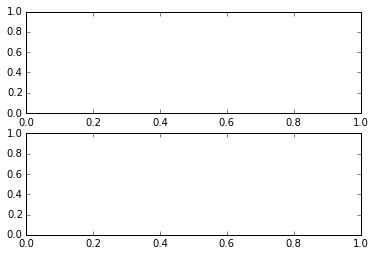

In [13]:
f, ax = plt.subplots(2,1)

In [14]:
f.axes

The basic view of matplotlib is: a figure contains one or more axes, axes draw
and return collections of one or more geometric objects (lines, patches, etc).

For all the gory details on this topic, see the matplotlib [artist tutorial](http://matplotlib.sourceforge.net/users/artists.html).

In [15]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x107111e80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x107340a20>], dtype=object)

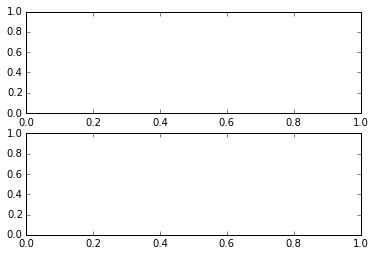

In [16]:
ax[0].figure

## Summary example

Let's make a simple plot that contains a few commonly used decorations:

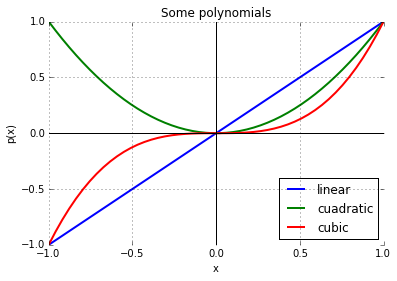

In [17]:
f, ax = plt.subplots()

# Three simple polyniomials
x = np.linspace(-1, 1)
y1, y2, y3 = [x**i for i in [1,2,3]]

# Plot each with a label (for a legend)
ax.plot(x, y1, label='linear')
ax.plot(x, y2, label='cuadratic')
ax.plot(x, y3, label='cubic')
# Make all lines drawn so far thicker
plt.setp(ax.lines, linewidth=2)

# Add a grid and a legend that doesn't overlap the lines
ax.grid()
ax.legend(loc='lower right')

# Add black horizontal and vertical lines through the origin
ax.axhline(0, color='black')
ax.axvline(0, color='black')

# No frame around the axes
ax.set_frame_on(False)

# Set main text elements of the plot
ax.set_title('Some polynomials')
ax.set_xlabel('x')
ax.set_ylabel('p(x)')

Common plot types
=================

Error plots
-----------

First a very simple error plot

<Container object of 3 artists>

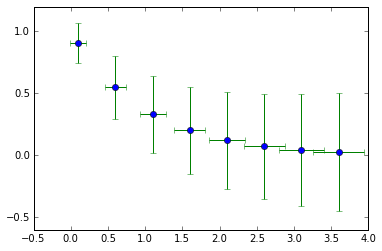

In [18]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2 * np.sqrt(x)
xerr = 0.1 + x / 15

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', ecolor='g')

Logarithmic plots
-----------------

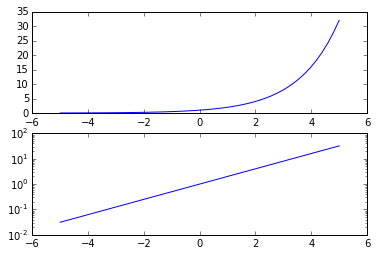

In [19]:
x = np.linspace(-5, 5)
y = 2 ** x

f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(x, y)
ax2.semilogy(x, y)

Bar plots
---------

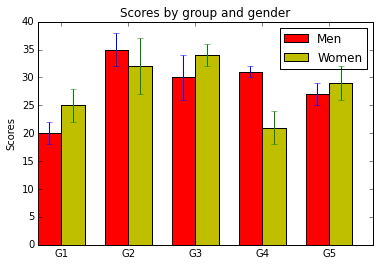

In [20]:
N = 5
men_means = (20, 35, 30, 31, 27)
men_std = (2, 3, 4, 1, 2)
women_means = (25, 32, 34, 21, 29)
women_std = (3, 5, 2, 3, 3)

ind = np.arange(N)  # the x locations for the groups
width = 0.35        # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1, rects2), ('Men', 'Women'))

Scatter plots
-------------

The ``scatter`` command produces scatter plots with arbitrary markers.

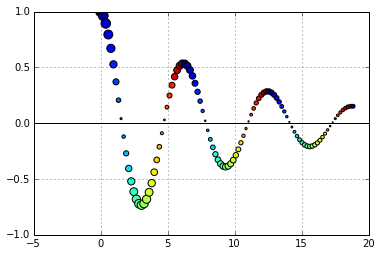

In [21]:
from matplotlib import cm    # cm == colormap

t = np.linspace(0.0, 6*np.pi, 100)
y = np.exp(-0.1 * t) * np.cos(t)
phase = t % (2 * np.pi)

f, ax = plt.subplots()
ax.scatter(t, y, s=100 * abs(y), c=phase, cmap=cm.jet)
ax.set_ylim(-1, 1)

ax.grid()
ax.axhline(color='black')

## Exercise

Consider you have the following data in a text file (The file `data/stations.txt` contains the full dataset):

    # Station  Lat    Long   Elev 
    BIRA    26.4840 87.2670 0.0120
    BUNG    27.8771 85.8909 1.1910
    GAIG    26.8380 86.6318 0.1660
    HILE    27.0482 87.3242 2.0880
    ... etc.
    
    
These are the names of seismographic stations in the Himalaya, with their coordinates and elevations in Kilometers.

1. Use ``np.loadtxt`` to load the data, providing a custom data-type in order to to handle the string column.
    
2. Make a scatter plot of all of these, using both the size and the color to (redundantly) encode elevation.  Label each station by its 4-letter code, and add a colorbar on the right that shows the color-elevation map.
    
3. *Bonus:* If you have the <a href="http://matplotlib.org/basemap/">basemap toolkit</a> installed, repeat the same exercise but draw a grid with parallels and meridians, add rivers in cyan and country boundaries in yellow.  Also, draw the background using the NASA BlueMarble image of Earth.

    
**Tips**
    
* The data-type for a string of length 4 is ``(str, 4)``.
    
* You can check whether you have Basemap installed with:
    
      from mpl_toolkits.basemap import Basemap
    
* For the basemap part, choose a text label color that provides adequate reading contrast over the image background.
    
* Create your Basemap with 'i' resolution, otherwise it will take forever to draw.

Histograms
----------

Matplotlib has a built-in command for histograms.

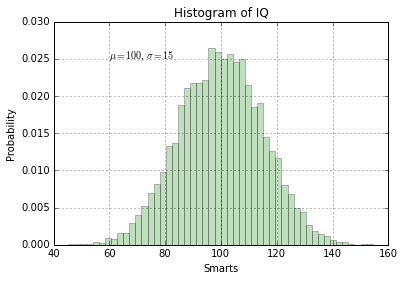

In [22]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.25)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

Aribitrary text and LaTeX support
=================================

In matplotlib, text can be added either relative to an individual axis object
or to the whole figure.

These commands add text to an Axis:

- title() - add a title
- xlabel() - add an axis label to the x-axis
- ylabel() - add an axis label to the y-axis
- text() - add text at an arbitrary location
- annotate() - add an annotation, with optional arrow

And these act on the whole figure:

- figtext() - add text at an arbitrary location
- suptitle() - add a title

And any text field can contain LaTeX expressions for mathematics, as long as
they are enclosed in ``$`` signs.

This example illustrates all of them:

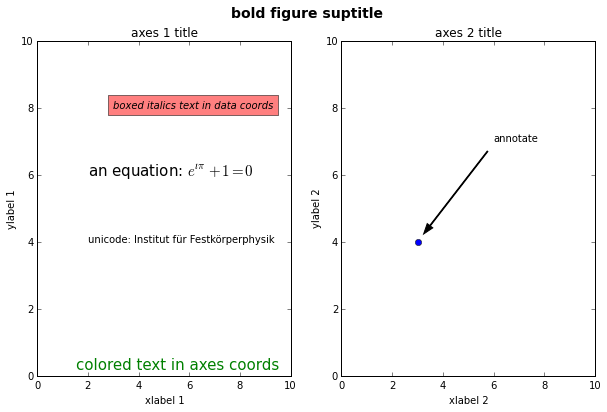

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax1.set_title('axes 1 title')
ax2.set_title('axes 2 title')

ax1.set_xlabel('xlabel 1')
ax2.set_xlabel('xlabel 2')
ax1.set_ylabel('ylabel 1')
ax2.set_ylabel('ylabel 2')

ax1.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax1.text(2, 6, r'an equation: $e^{\i\pi}+1=0$', fontsize=15)

ax1.text(2, 4, 'unicode: Institut für Festkörperphysik')

ax1.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='green', fontsize=15)

# Annotating a piece of a plot
ax2.plot([3], [4], 'o')
ax2.annotate('annotate', xy=(3, 4), xytext=(6, 7),
            arrowprops=dict(facecolor='black', width=0.8, 
                            headwidth=7, shrink=0.08))

# Set the axis range to be [0,10] in both directions
for ax in (ax1, ax2):
    ax.axis([0, 10, 0, 10])

Axis sharing
============

The simplest way to share axes is to use the ``subplots`` function.  More
fine-grained control can be obtained by individually adding subplots and adding
share calls to those, but in most cases the functionality from ``subplots`` is sufficient:

In [30]:
# Here, we need an interactive GUI backend
%matplotlib 

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x**2)

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.suptitle('Sharing X axis')
axarr[0].plot(x, y)
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.suptitle('Sharing Y axis')
ax1.plot(x, y)
ax2.scatter(x, y)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
f.suptitle('Sharing both axes')
ax1.plot(x, y)
ax2.scatter(x, y)
ax3.scatter(x, 2*y**2-1,color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False);

Using matplotlib backend: MacOSX


Basic event handling
====================

Matplotlib has a builtin, toolkit-independent event model that is fairly rich.
If you want to develop full-fledged applications with very complex and fast
interactions, you are likely better off choosing a specific Graphical User
Interface (GUI) toolkit and using its specific event model.  But for many
scientific uses, what matplotlib offers is more than sufficient, and it has the
advantage of working identically regardless of the GUI toolkit you choose to
run matplotlib under.

Here we will cover the bare essentials only, for full details you should
consult the [event handling section](http://matplotlib.org/users/event_handling.html) of the matplotlib user guide.

The basic idea of *all* event handling is always the same: the windowing
environment registers an event (mouse movement, click, keyboard press, etc)
produced by the user.  In advance, you have registered *event handlers*:
functions you define that are meant to be called when specific types of events
occur.  The registration action is called *connecting* the event handler, and
is performed by the `mpl_connect` method of the figure canvas attribute (the
canvas is the drawing area of the figure object, the entire raw object where
events take place).

The windowing system will then pass the event (each event has some relevant
information that goes with it, such as which key or button was pressed) to your
function, which can act on it.  These functions are referred to as *callbacks*,
because they are meant to be 'called back' not by you, but by the windowing
toolkit when the right event goes by.

Here is the simplest possible matplotlib event handler:

In [31]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print ('button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(
        event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

The ``FigureCanvas`` method ``mpl_connect`` returns a connection id which
is simply an integer.  When you want to disconnect the callback, just call::

    fig.canvas.mpl_disconnect(cid)

The most commonly used event types are ``KeyEvent`` and ``MouseEvent``, both of
which have the following attributes:

    ``x``
        x position - pixels from left of canvas

    ``y``
        y position - pixels from bottom of canvas

    ``inaxes``
        the ``matplotlib.axes.Axes`` instance if mouse is over axes

    ``xdata``
        x coord of mouse in data coords

    ``ydata``
        y coord of mouse in data coords

In addition, ``MouseEvent`` have:

    ``button``
        button pressed None, 1, 2, 3, 'up', 'down' (up and down are used for
        scroll events)

    ``key``
        the key pressed: None, any character, 'shift', 'win', or 'control'

<div class="exercise">

Exercise
--------

Extend the scatter plot exercise above with the seismic stations, to print the location (four-letter string) of the station you click on.  Use a threshold for distance, and discriminate between a click below threshold (considered to be 'on') vs a miss, in which case you should indicate what the closest station is, its coordinates and the distance to it from the click.

Image display
=============

The ``imshow`` command can display single or multi-channel images.  A simple
array of random numbers, plotted in grayscale:

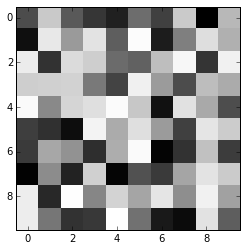

In [41]:
# Let's get back to inline figures
%matplotlib inline
z = np.random.random((10, 10))
plt.imshow(z, cmap=plt.cm.gray, interpolation='nearest')

In [42]:
img = plt.imread('data/stained_glass_barcelona.png')

print("Shape:", img.shape)
print()
print(img[:5, :5, 0])

Shape: (1200, 628, 4)

[[ 0.00392157  0.00392157  0.00784314  0.00392157  0.00392157]
 [ 0.00392157  0.          0.00784314  0.00784314  0.00784314]
 [ 0.00392157  0.00392157  0.00784314  0.00784314  0.00784314]
 [ 0.00784314  0.00392157  0.00392157  0.00784314  0.01176471]
 [ 0.01176471  0.00392157  0.00392157  0.00784314  0.00784314]]


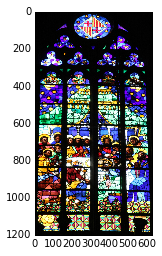

In [43]:
plt.imshow(img)

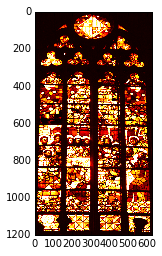

In [44]:
plt.imshow(img[..., 0], cmap=plt.cm.hot)

<div class="exercise">
    
Exercise
--------

Write a notebook where you can load an image and then perform the following operations on it:
    
1. Create a figure with four plots that show both the full-color image and color channel of the image with the right colormap for that color.  Ensure that the axes are linked so zooming in one image zooms the same region in the others.
    
2. Compute a luminosity and per-channel histogram and display all four histograms in one figure, giving each a separate plot (hint: a 4x1 plot works best for this).  Link the appropriate axes together.
    
3. Create a black-and-white (or more precisely, grayscale) version of the image.  Compare the results from a naive average of all three channels with that of a model that uses 30% red, 59% green and 11% blue, by displaying all three (full color and both grayscales) side by side with linked axes for zooming.
    
Hint: look for the [matplotlib image tutorial](http://matplotlib.org/users/image_tutorial.html).

Simple 3d plotting with matplotlib
==================================

Note that you must execute at least once in your session::

In [45]:
from mpl_toolkits.mplot3d import Axes3D

One this has been done, you can create 3d axes with the ``projection='3d'`` keyword to ``add_subplot``::

    fig = plt.figure()
    fig.add_subplot(<other arguments here>, projection='3d')

or

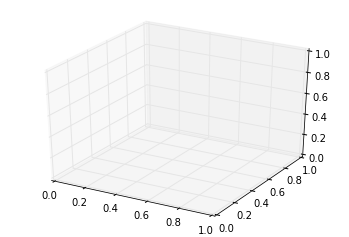

In [46]:
f, ax = plt.subplots(subplot_kw={'projection': '3d'})

A simple surface plot:

(-1.01, 1.01)

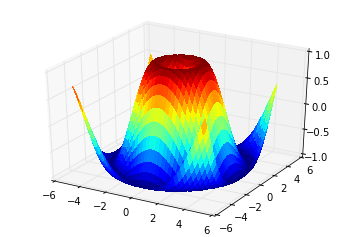

In [47]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

f, ax = plt.subplots(subplot_kw={'projection': '3d'})

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
                       linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

And a parametric surface specified in cylindrical coordinates:

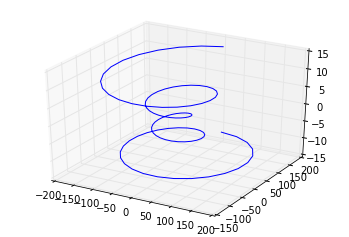

In [48]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

t = np.linspace(-4*np.pi, 4*np.pi, 100)

r = t**2 + 40
x = r * np.sin(t)
y = r * np.cos(t)
z = t

ax.plot(x, y, z)